In [158]:
FULLY = 0.25
PARTIALLY = 0.73

In [159]:
N = 100  # items
D = 2071  # users
q = 10  # latent dimension

In [160]:
# Real data
from mangaki.algo.dataset import Dataset
rating_values = {'dislike': 1, 'wontsee': 2, 'neutral': 3, 'willsee': 4, 'like': 5, 'favorite': 6}
#from mangaki.utils.values import rating_values

dataset = Dataset()
dataset.load_csv('ratings-ordered.csv', convert=lambda choice: rating_values[choice])

In [161]:
from scipy.sparse import coo_matrix

rows = dataset.anonymized.X[:, 0]
cols = dataset.anonymized.X[:, 1]
data = dataset.anonymized.y
mangaki = coo_matrix((data, (rows, cols)), shape=(dataset.anonymized.nb_users, dataset.anonymized.nb_works)).tocsr()

In [162]:
mangaki.data

array([ 5.,  5.,  5., ...,  2.,  4.,  2.])

In [163]:
from sklearn.model_selection import ShuffleSplit
import random

splitter = ShuffleSplit(n_splits=1, train_size=FULLY)
X_fulltrain = []
y_fulltrain = []
X_parttrain = []
y_parttrain = []
X_test = []
y_test = []
for i_full_train, i_train_test in splitter.split(range(D)):
    i_full_train = set(i_full_train)
    i_train_test = set(i_train_test)
    for (user_id, work_id), rating in zip(dataset.anonymized.X, dataset.anonymized.y):
        if user_id in i_full_train:
            X_fulltrain.append((user_id, work_id))
            y_fulltrain.append(rating)
        elif random.random() < PARTIALLY:
            X_parttrain.append((user_id, work_id))
            y_parttrain.append(rating)
        else:
            X_test.append((user_id, work_id))
            y_test.append(rating)
X_fulltrain = np.array(X_fulltrain)
y_fulltrain = np.array(y_fulltrain)
X_parttrain = np.array(X_parttrain)
y_parttrain = np.array(y_parttrain)
X_train = np.vstack((X_fulltrain, X_parttrain))
y_train = np.concatenate((y_fulltrain, y_parttrain))
X_test = dataset.anonymized.X[i_test]
y_test = dataset.anonymized.y[i_test]

In [96]:
def compute_all_errors(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    print('Train RMSE=', model.compute_rmse(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    print('Test RMSE=', model.compute_rmse(y_test, y_test_pred))

# When FULLY = 50%, PARTIALLY = 60% (total: 80%)

In [140]:
from mangaki.algo.als import MangakiALS

als = MangakiALS()
als.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
als.fit(X_train, y_train)
compute_all_errors(als, X_train, y_train, X_test, y_test)

Computing M: (2071 × 10086)
Chrono: fill and center matrix [0q, 874ms]
Shapes (2071, 20) (20, 10086)
Chrono: factor matrix [0q, 6387ms]
Train RMSE= 0.895676955371
Test RMSE= 0.961083202139


In [99]:
from mangaki.algo.svd import MangakiSVD

svd = MangakiSVD()
svd.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
svd.fit(X_train, y_train)
compute_all_errors(svd, X_train, y_train, X_test, y_test)

Computing M: (2071 × 10086)


/Users/jilljenn/code/mangaki/mangaki/mangaki/algo/svd.py:36: RuntimeWarning: invalid value encountered in double_scalars
  means[i] = np.sum(matrix[i]) / np.sum(matrix[i] != 0)


Chrono: fill and center matrix [0q, 633ms]
Shapes (2071, 20) (20,) (20, 10086)
Chrono: factor matrix [0q, 693ms]
Train RMSE= 1.08928598343
Test RMSE= 1.11938618551


In [98]:
from mangaki.algo.knn import MangakiKNN

knn = MangakiKNN()
knn.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
knn.fit(X_train, y_train)
compute_all_errors(knn, X_train, y_train, X_test, y_test)

Train RMSE= 2.03534214322
Test RMSE= 2.06726144326


# When FULLY = 25%, PARTIALLY = 73% (total: 80%)

In [164]:
from mangaki.algo.als import MangakiALS

als = MangakiALS()
als.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
als.fit(X_train, y_train)
compute_all_errors(als, X_train, y_train, X_test, y_test)

Computing M: (2071 × 10086)
Chrono: fill and center matrix [0q, 853ms]
Shapes (2071, 20) (20, 10086)
Chrono: factor matrix [0q, 6462ms]
Train RMSE= 0.896739922264
Test RMSE= 0.958452733722


In [165]:
from mangaki.algo.svd import MangakiSVD

svd = MangakiSVD()
svd.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
svd.fit(X_train, y_train)
compute_all_errors(svd, X_train, y_train, X_test, y_test)

Computing M: (2071 × 10086)


/Users/jilljenn/code/mangaki/mangaki/mangaki/algo/svd.py:36: RuntimeWarning: invalid value encountered in double_scalars
  means[i] = np.sum(matrix[i]) / np.sum(matrix[i] != 0)


Chrono: fill and center matrix [0q, 586ms]
Shapes (2071, 20) (20,) (20, 10086)
Chrono: factor matrix [0q, 650ms]
Train RMSE= 1.09278685532
Test RMSE= 1.11839989583


In [166]:
from mangaki.algo.knn import MangakiKNN

knn = MangakiKNN()
knn.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
knn.fit(X_train, y_train)
compute_all_errors(knn, X_train, y_train, X_test, y_test)

Train RMSE= 2.04675025879
Test RMSE= 2.07535256316


0.138281790056


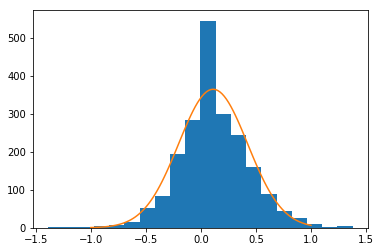

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

values = als.U[:, 19]
nb_samples = len(values)
mu = values.mean()
sigma = values.std()

nb_boxes = 20
size = (values.max() - values.min()) / nb_boxes
print(size)
x = np.linspace(-1, 1, 100)
plt.hist(als.U[:, 19], nb_boxes)
plt.plot(x, nb_samples * size * mlab.normpdf(x, mu, sigma))

In [168]:
mu_pop = als.U.mean(axis=0)
sigma_pop = np.cov(als.U.T)

In [169]:
mu_bias = als.means.mean()
sigma_bias = als.means.std()

In [170]:
from collections import Counter

nb_ratings = Counter(X_fulltrain[:, 0])

In [171]:
nb_ratings.most_common(5)

[(255, 1606), (1571, 1552), (121, 1522), (1410, 1248), (1945, 1115)]

In [172]:
popularity = Counter(X_train[:, 1])

In [173]:
popularity.most_common(5)

[(0, 1283), (1, 1188), (2, 1140), (4, 1124), (3, 1100)]

In [174]:
fake_bias = np.random.normal(mu_bias, sigma_bias, size=len(i_full_train))

In [175]:
X_faketrain = []
y_faketrain = []
fake_U = np.random.multivariate_normal(mu_pop, sigma_pop, size=len(i_full_train))
for i, user_id in enumerate(i_full_train):
    weights = np.array(list(popularity.values())) / sum(popularity.values())
    work_ids = np.random.choice(list(popularity.keys()), size=nb_ratings[user_id], p=weights, replace=False)
    X_faketrain.extend([(user_id, work_id) for work_id in work_ids])
    y_faketrain.extend(als.VT.T[work_ids].dot(fake_U[i]) + fake_bias[i])
X_faketrain = np.array(X_faketrain)
y_faketrain = np.array(y_faketrain)

In [176]:
X_fake = np.vstack((X_faketrain, X_parttrain))
y_fake = np.concatenate((y_faketrain, y_parttrain))

# When FULLY = 50%, PARTIALLY = 60% (total: 80%)

In [155]:
als = MangakiALS()
als.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
als.fit(X_fake, y_fake)
compute_all_errors(als, X_fake, y_fake, X_test, y_test)

Computing M: (2071 × 10086)
Chrono: fill and center matrix [0q, 887ms]
Shapes (2071, 20) (20, 10086)
Chrono: factor matrix [0q, 6118ms]
Train RMSE= 0.587909831104
Test RMSE= 1.4260386546


In [156]:
svd = MangakiSVD()
svd.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
svd.fit(X_fake, y_fake)
compute_all_errors(svd, X_fake, y_fake, X_test, y_test)

Computing M: (2071 × 10086)


/Users/jilljenn/code/mangaki/mangaki/mangaki/algo/svd.py:36: RuntimeWarning: invalid value encountered in double_scalars
  means[i] = np.sum(matrix[i]) / np.sum(matrix[i] != 0)


Chrono: fill and center matrix [0q, 618ms]
Shapes (2071, 20) (20,) (20, 10086)
Chrono: factor matrix [0q, 699ms]
Train RMSE= 0.722305878199
Test RMSE= 1.46782574115


In [157]:
knn = MangakiKNN()
knn.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
knn.fit(X_fake, y_fake)
compute_all_errors(knn, X_fake, y_fake, X_test, y_test)

Train RMSE= 2.10213686971
Test RMSE= 2.15983322509


# When FULLY = 25%, PARTIALLY = 73% (total: 80%)

In [177]:
als = MangakiALS()
als.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
als.fit(X_fake, y_fake)
compute_all_errors(als, X_fake, y_fake, X_test, y_test)

Computing M: (2071 × 10086)
Chrono: fill and center matrix [0q, 928ms]
Shapes (2071, 20) (20, 10086)
Chrono: factor matrix [0q, 6916ms]
Train RMSE= 0.751709581523
Test RMSE= 1.18777848707


In [178]:
svd = MangakiSVD()
svd.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
svd.fit(X_fake, y_fake)
compute_all_errors(svd, X_fake, y_fake, X_test, y_test)

Computing M: (2071 × 10086)


/Users/jilljenn/code/mangaki/mangaki/mangaki/algo/svd.py:36: RuntimeWarning: invalid value encountered in double_scalars
  means[i] = np.sum(matrix[i]) / np.sum(matrix[i] != 0)


Chrono: fill and center matrix [0q, 631ms]
Shapes (2071, 20) (20,) (20, 10086)
Chrono: factor matrix [0q, 690ms]
Train RMSE= 0.926449672331
Test RMSE= 1.28065678659


In [179]:
knn = MangakiKNN()
knn.set_parameters(dataset.anonymized.nb_users, dataset.anonymized.nb_works)
knn.fit(X_fake, y_fake)
compute_all_errors(knn, X_fake, y_fake, X_test, y_test)

Train RMSE= 2.18239929253
Test RMSE= 2.1875031604
